In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [2]:
sb.__version__

'0.11.1'

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [3]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [4]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
pr.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
68.2       1
67.1       1
73.3       1
50.6       1
87.1       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [6]:
pr.poverty_rate.replace(['-'],0.0,inplace = True)

In [7]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [8]:
pr.poverty_rate = pr.poverty_rate.astype("float")
pr.poverty_rate.dtype

dtype('float64')

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

In [11]:
poverty_rates = pr.groupby("Geographic Area").poverty_rate.mean()

In [12]:
poverty_rates.head()

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
Name: poverty_rate, dtype: float64

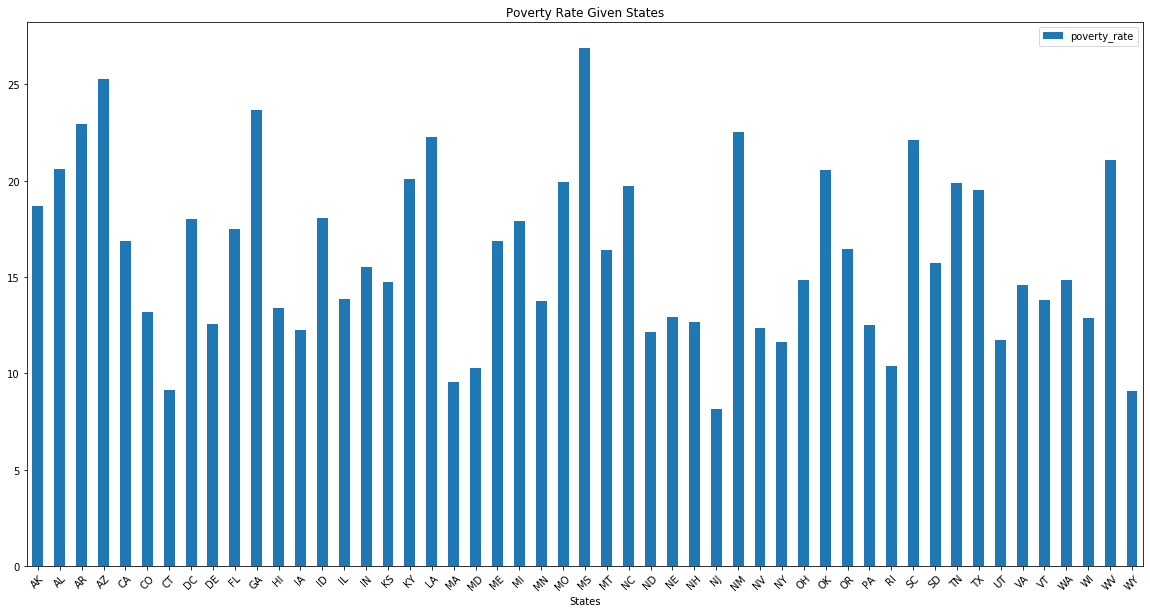

In [9]:
poverty_rates.plot(xlabel = "States", kind="bar", figsize=(20,10), title="Poverty Rate Given States", rot=45, legend = True)

plt.show()

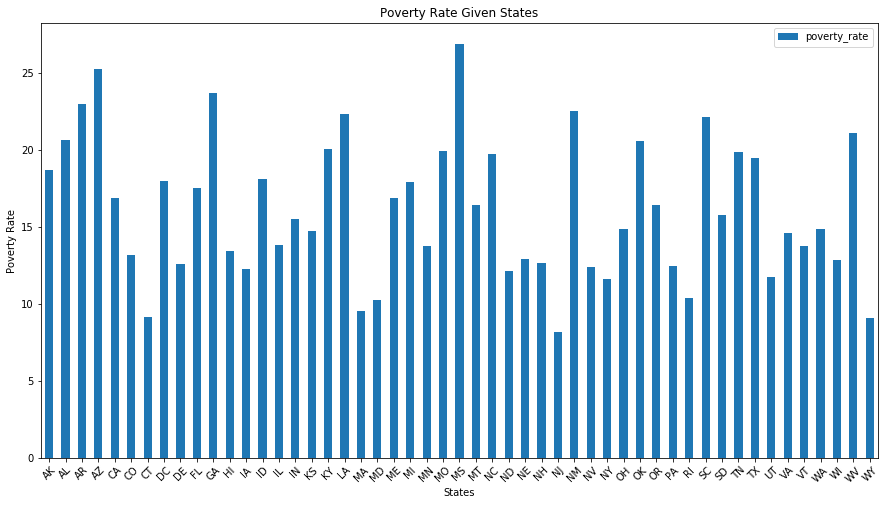

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

In [10]:
sorted_poverty_rates = poverty_rates.sort_values(ascending  = False)
sorted_poverty_rates

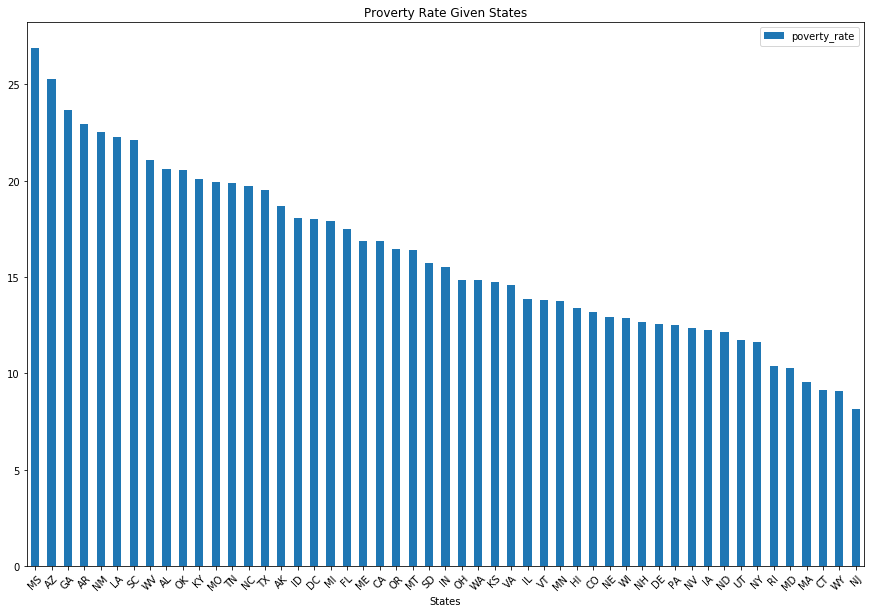

In [15]:
sorted_poverty_rates.plot.bar(figsize = (15,10), title = "Proverty Rate Given States", rot = 45, legend = True, xlabel = "States")
plt.show()

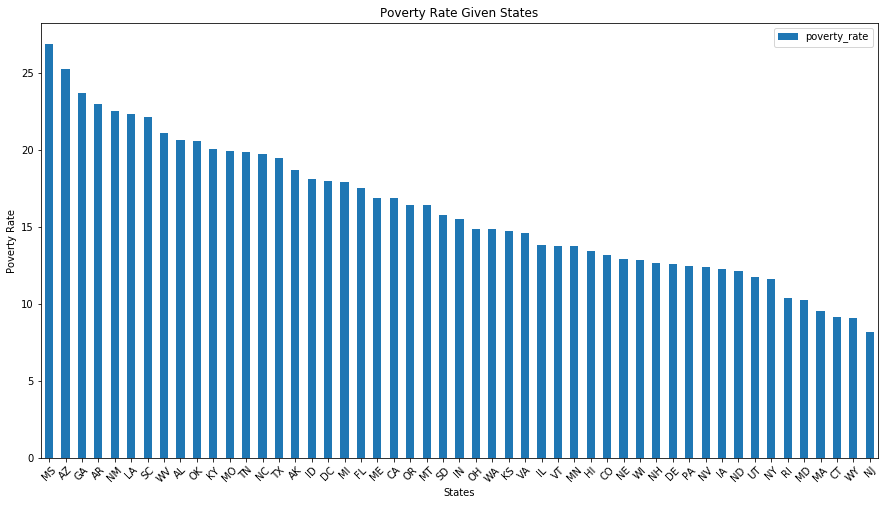

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

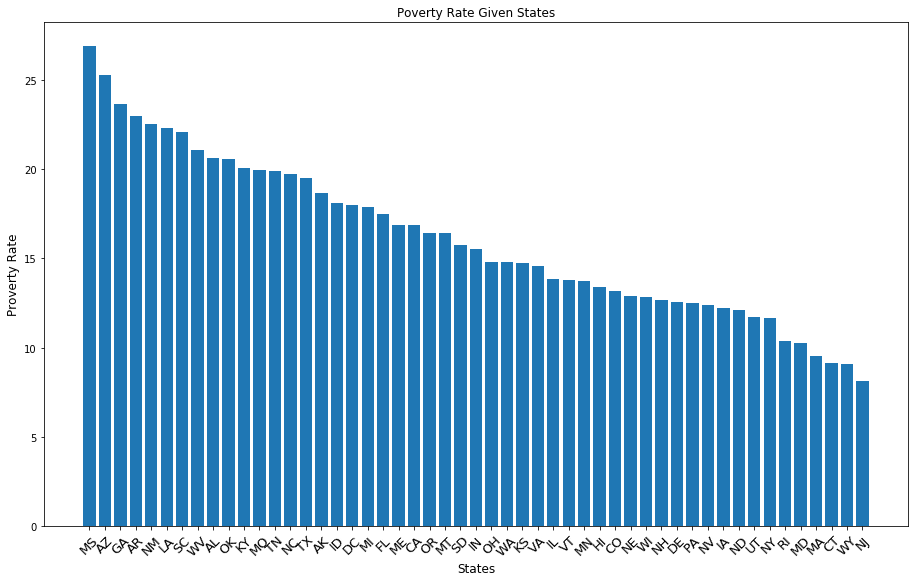

In [16]:
fig = plt.figure(figsize = (12,7))
ax1 = fig.add_axes([0,0,1,1])
ax1.bar(sorted_poverty_rates.index, sorted_poverty_rates)
ax1.set_title("Poverty Rate Given States", fontdict = {"fontsize":12})
ax1.set_xlabel("States", fontdict = {"fontsize":12} )
ax1.set_ylabel("Proverty Rate", fontdict = {"fontsize":12})
plt.xticks(rotation = 45, fontsize =13)
plt.show()

Text(0.5, 1.0, 'Poverty Rate Given States')

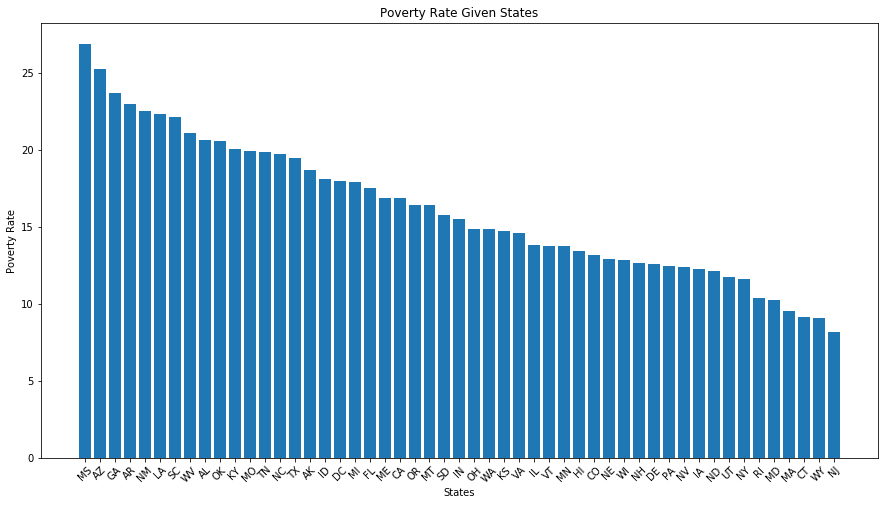

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

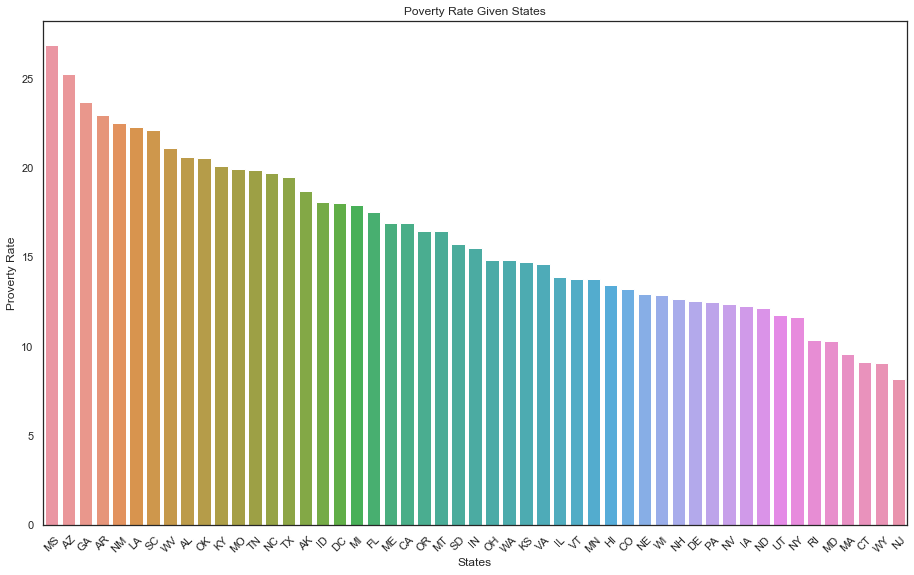

In [21]:
fig = plt.figure(figsize = (12,7))
ax1 = fig.add_axes([0,0,1,1])
sb.set_context( rc ={'xtick.labelsize': 14})
sb.set(style = "white", palette = "muted")
sb.barplot(sorted_poverty_rates.index, sorted_poverty_rates)
ax1.set_xlabel("States", fontdict = {"fontsize":12} )
ax1.set_ylabel("Proverty Rate", fontdict = {"fontsize":12})
ax1.set_title("Poverty Rate Given States", fontdict = {"fontsize":12})
plt.xticks(rotation = 45,)
plt.show()

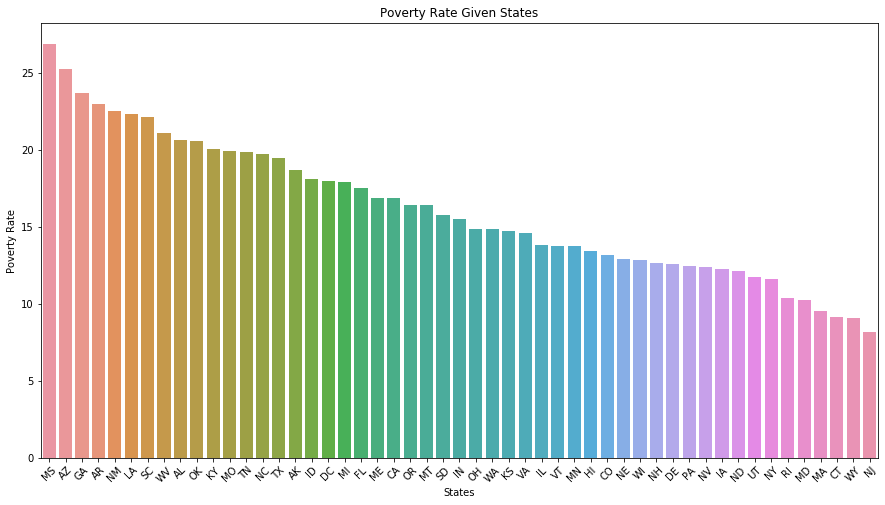

## 2. Most common 15 Name or Surname of killed people 

In [22]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [23]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [3]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [4]:
###muharrem beyin yolunu kısaltılmışı
fullname=pd.DataFrame(data=pairs)
fullname.rename(columns={"name":"Full Name"}, inplace=True)
fullname.head()

,Full Name
0,"[Tim, Elliot]"
1,"[Lewis, Lee, Lembke]"
2,"[John, Paul, Quintero]"
3,"[Matthew, Hoffman]"
4,"[Michael, Rodriguez]"


In [23]:
fulllname=[]
for i in range(len(fullname)):
    if len(fullname["Full Name"].iloc[i]) == 2:
        fulllname.append(fullname["Full Name"].iloc[i][0])
        fulllname.append(fullname["Full Name"].iloc[i][1])
    else:
        fulllname.append(fullname["Full Name"].iloc[i][0])
        fulllname.append(fullname["Full Name"].iloc[i][1])
        fulllname.append(fullname["Full Name"].iloc[i][2])
fulllname=pd.DataFrame(fulllname,columns={"Full Name"})

fulllname.head(15)

,Full Name
0,Tim
1,Elliot
2,Lewis
3,Lee
4,Lembke
5,John
6,Paul
7,Quintero
8,Matthew
9,Hoffman


In [24]:
from collections import Counter
c = Counter(fulllname["Full Name"])
mostCommon = c.most_common(15)

In [25]:
mostCommon

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Richard', 36),
 ('Smith', 35),
 ('Anthony', 32),
 ('J.', 32),
 ('Johnson', 29)]

In [26]:
df = pd.DataFrame(mostCommon, columns = ["names", "commons"])
df.head()

,names,commons
0,Michael,91
1,James,57
2,David,57
3,Robert,48
4,Joseph,48


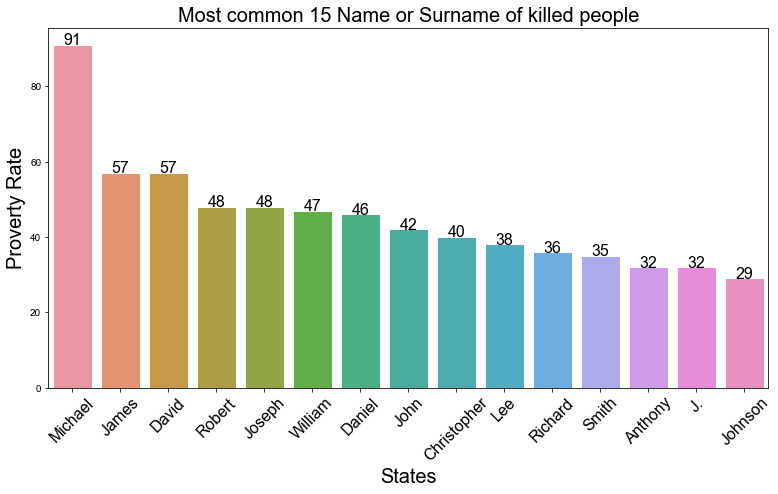

In [27]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_axes([0,0,1,1])
sb.set_context( rc ={'xtick.labelsize': 8.8})
sb.set(style = "white", palette = "muted")
sb.barplot( x = "names", y ="commons",  data = df )
ax1.set_xlabel("States", fontdict = {"fontsize":20} )
ax1.set_ylabel("Proverty Rate", fontdict = {"fontsize":20})
ax1.set_title("Most common 15 Name or Surname of killed people", fontdict = {"fontsize":20})
plt.xticks(rotation = 45, fontsize = 16)
for index, row in df.iterrows():
    ax1.text(row.name,row.commons, round(row.commons,1), color='black', ha="center", fontsize=16)
    plt.tight_layout()
plt.show()

In [15]:
##muharrem beyin yolu 
fullname=pd.DataFrame(data=pairs)
fullname.rename(columns={"name":"Full Name"}, inplace=True)
fullname.head()

,Full Name
0,"[Tim, Elliot]"
1,"[Lewis, Lee, Lembke]"
2,"[John, Paul, Quintero]"
3,"[Matthew, Hoffman]"
4,"[Michael, Rodriguez]"


In [16]:
surname=[]
for i in range(len(fullname)):
    surname.append(fullname["Full Name"].iloc[i][-1])
surname=pd.DataFrame(surname,columns={"Surname"})

surname.head()

,Surname
0,Elliot
1,Lembke
2,Quintero
3,Hoffman
4,Rodriguez


In [8]:
firstname=[]
for i in range(len(fullname)):
   firstname.append(fullname["Full Name"].iloc[i][0])
firstname=pd.DataFrame(firstname,columns={"Firstname"})

firstname.head()

,Firstname
0,Tim
1,Lewis
2,John
3,Matthew
4,Michael


In [18]:
secondname=[]
for i in range(len(fullname)):
    if len(fullname["Full Name"].iloc[i])>2:
        secondname.append(fullname["Full Name"].iloc[i][1])
    else:  secondname.append("")
secondname=pd.DataFrame(secondname,columns={"Secondname"})

secondname.head()

,Secondname
0,
1,Lee
2,Paul
3,
4,


In [19]:
sur_name=surname.rename(columns={"Surname":"name"})
first_name=firstname.rename(columns={"Firstname":"name"})
second_name=secondname.rename(columns={"Secondname":"name"})

totalnames=first_name.append([second_name,sur_name], ignore_index=True)
ttn=list(totalnames.name)
ttn

['Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [20]:
ttn2=list(firstname.Firstname)+list(secondname.Secondname)+list(surname.Surname)

In [21]:
from collections import Counter
c = Counter(ttn)
mostCommon = c.most_common(16)
mostCommon

[('', 1602),
 ('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('Smith', 36),
 ('J.', 32),
 ('Johnson', 32),
 ('Anthony', 31)]

In [31]:
df2 = pd.DataFrame(mostCommon, columns = ["names", "commons"])
df2.head()

,names,commons
0,Michael,91
1,James,57
2,David,57
3,Robert,48
4,Joseph,48


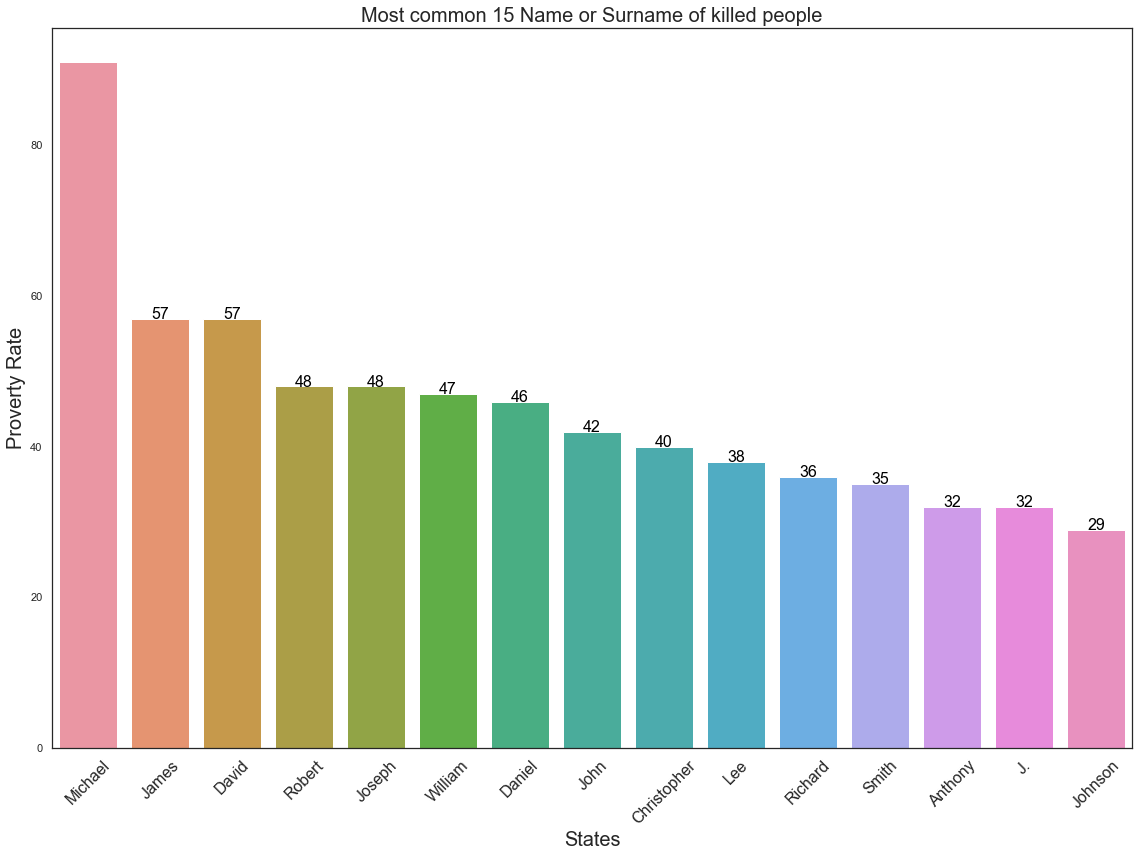

In [32]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_axes([0,0,1,1])
sb.set_context( rc ={'xtick.labelsize': 8.8})
sb.set(style = "white", palette = "muted")
sb.barplot( x = "names", y ="commons",  data = df2 )
ax1.set_xlabel("States", fontdict = {"fontsize":20} )
ax1.set_ylabel("Proverty Rate", fontdict = {"fontsize":20})
ax1.set_title("Most common 15 Name or Surname of killed people", fontdict = {"fontsize":20})
plt.xticks(rotation = 45, fontsize = 16)
for index, row in df.iterrows():
    ax1.text(row.name,row.commons, round(row.commons,1), color='black', ha="center", fontsize=16)
    plt.tight_layout()
plt.show()

In [25]:
names1, surnames = zip(*pairs)
names1
surnames

('Elliot',
 'Lee',
 'Paul',
 'Hoffman',
 'Rodriguez',
 'Joe',
 'Arnold',
 'Nichols',
 'Steele',
 'Sapp',
 'Wetter',
 'Sneed',
 'Hanif',
 'Ryan',
 'Julian',
 'Simpson',
 'Dudley',
 'Damon',
 'Hamby',
 'Foreman',
 'Martinez',
 'Smith',
 'Barbosa',
 'Figueroa',
 'Edward',
 'McClendon',
 'Golden',
 'Goebel',
 'Jordan',
 'Schroeder',
 'Edwards',
 'R.',
 'Sowell',
 'Earl',
 'Reed',
 'Ceja',
 'Massey',
 'Hall',
 'Shinwary',
 'Walker',
 'Meza',
 'Brumley',
 'Guillory',
 'Castle',
 'Campbell',
 'Carr',
 'Allen',
 'Angel',
 'Holmes',
 'Toto',
 'Meton',
 'Coignard',
 'Francis',
 'Turner',
 'Antonio',
 'King',
 'Myler',
 'Hutchins',
 'Jude',
 'Campbell',
 'Hernandez',
 'Kmetz',
 'Omar',
 'Garcia',
 'Leland',
 'Ingram',
 'Fletcher',
 'Terry',
 'Lance',
 'Nuu',
 'Karasek',
 'Willis',
 'James',
 'Barry',
 'Manuel',
 'Donnell',
 'Haglund',
 'Kassick',
 'Murphy',
 'D.',
 'Henderson',
 'Deshawn',
 'Purvis',
 'Lett',
 'Colon',
 'Muna',
 'Hernandez',
 'Ray',
 'Atkins',
 'Alfred',
 'Hill',
 'Sawyer',
 'All

In [26]:
ns = names1 + surnames

ns

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [27]:
from collections import Counter
c = Counter(ns)
mostCommon = c.most_common(15)

In [28]:
mostCommon

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [29]:
df = pd.DataFrame(mostCommon, columns = ["names", "commons"])
df.head()

,names,commons
0,Michael,91
1,David,57
2,James,56
3,Robert,48
4,Joseph,48


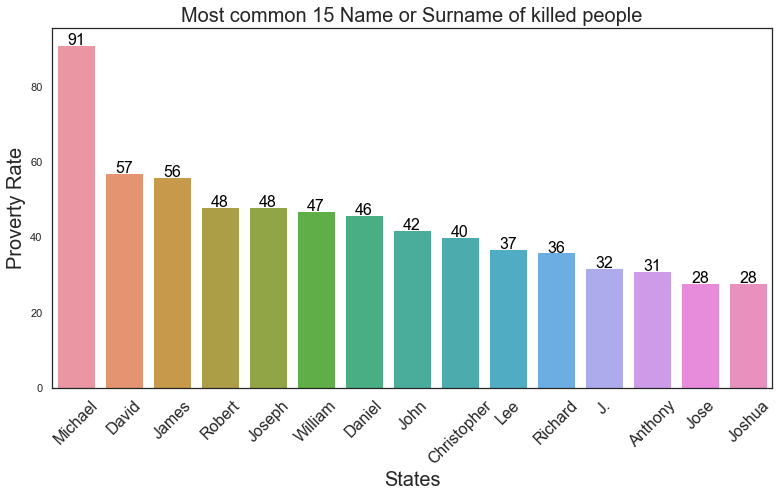

In [31]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_axes([0,0,1,1])
sb.set_context( rc ={'xtick.labelsize': 8.8})
sb.set(style = "white", palette = "muted")
sb.barplot( x = "names", y ="commons",  data = df )
ax1.set_xlabel("States", fontdict = {"fontsize":20} )
ax1.set_ylabel("Proverty Rate", fontdict = {"fontsize":20})
ax1.set_title("Most common 15 Name or Surname of killed people", fontdict = {"fontsize":20})
plt.xticks(rotation = 45, fontsize = 16)
for index, row in df.iterrows():
    ax1.text(row.name,row.commons, round(row.commons,1), color='black', ha="center", fontsize=16)
    plt.tight_layout()
plt.show()

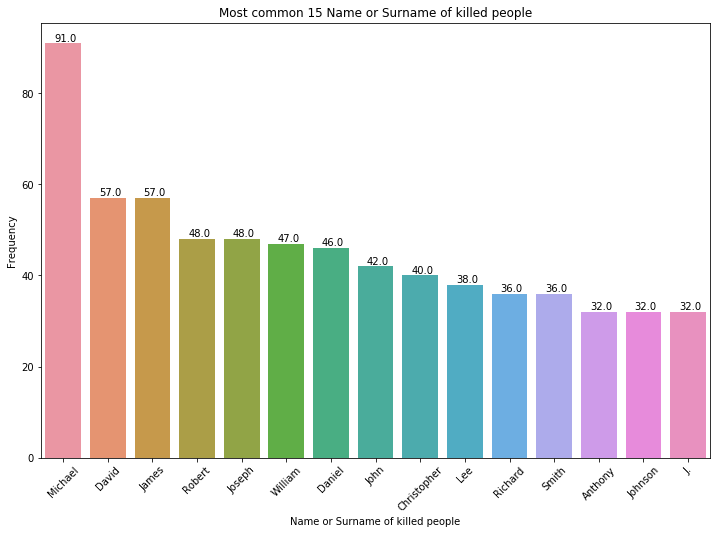

## 3. Killed People According to Races (Pie Chart)

In [32]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [33]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [34]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [35]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [36]:
kill.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [37]:
kill.dropna(subset = ["race"], inplace = True)

In [38]:
kill.isnull().sum()

id                          0
name                        0
date                        0
manner_of_death             0
armed                       6
age                        29
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       52
body_camera                 0
dtype: int64

In [39]:
kill.shape

(2340, 14)

In [40]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2340 non-null   int64  
 1   name                     2340 non-null   object 
 2   date                     2340 non-null   object 
 3   manner_of_death          2340 non-null   object 
 4   armed                    2334 non-null   object 
 5   age                      2311 non-null   float64
 6   gender                   2340 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2340 non-null   object 
 9   state                    2340 non-null   object 
 10  signs_of_mental_illness  2340 non-null   bool   
 11  threat_level             2340 non-null   object 
 12  flee                     2288 non-null   object 
 13  body_camera              2340 non-null   bool   
dtypes: bool(2), float64(1), 

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [41]:
k_r_m = kill.race.value_counts( normalize = True)

In [42]:
k_r_m

W    0.513248
B    0.264103
H    0.180769
A    0.016667
N    0.013248
O    0.011966
Name: race, dtype: float64

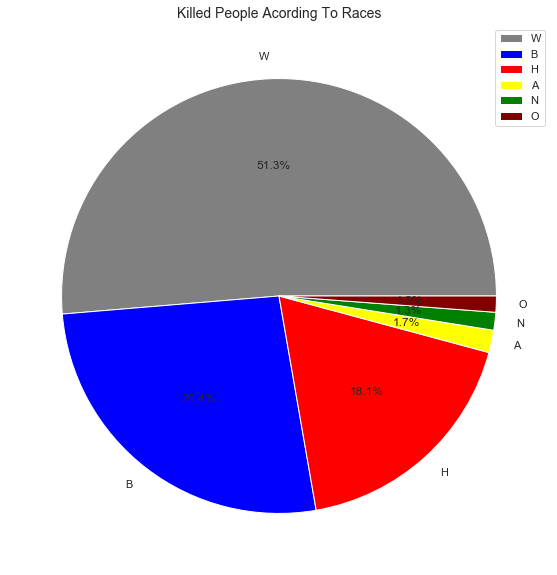

In [131]:
fig = plt.figure(figsize = (20, 10))
colors = ["grey",'blue','red','yellow','green',"maroon"]
plt.title("Killed People Acording To Races", fontsize=14)
plt.pie(k_r_m, labels =k_r_m.index,autopct='%1.1f%%', colors = colors)
plt.legend(loc="upper right")
plt.show()###legend ekleyebilir miyiz ?

###toplantı sonu...

Text(0.5, 1.0, 'Killed People According to Races')

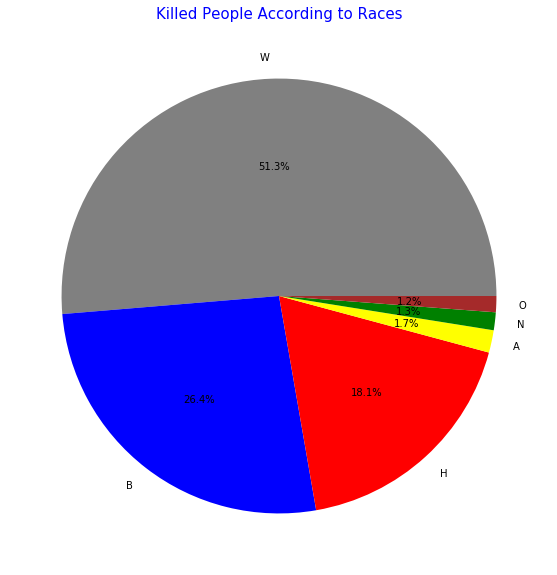

## 4a.Box plot of age in both genders separeted by manner of death.

In [48]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [49]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

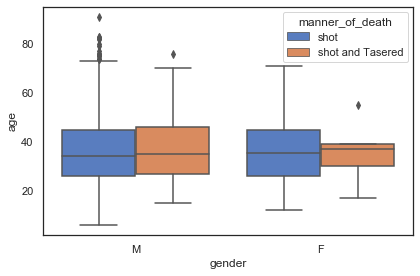

In [53]:
sb.boxplot( x = "gender", y = "age", data = kill, hue = "manner_of_death" )
plt.tight_layout()

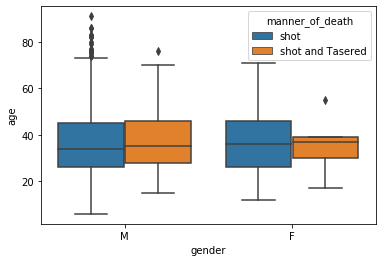

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

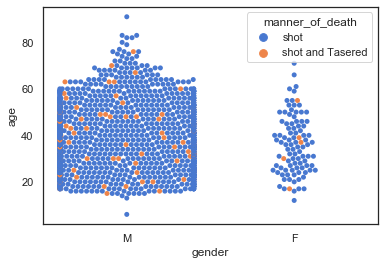

In [52]:
sb.swarmplot(x = "gender", y = "age", data = kill, hue = "manner_of_death")
plt.show()

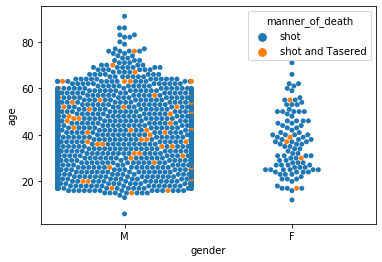

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

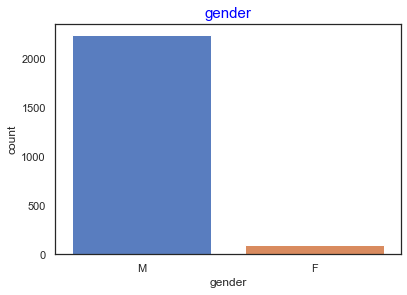

In [55]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,0.8,0.8])
ax1.set_title("gender", fontsize = 15, color = "blue")
sb.countplot(x = "gender", data = kill)
plt.show()

Text(0.5, 1.0, 'gender')

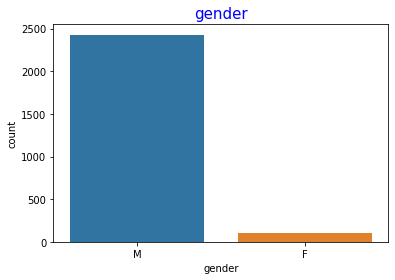

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [56]:
from collections import Counter
c = Counter(kill.armed)
mostCommon = c.most_common(7)
df = pd.DataFrame(mostCommon, columns = ["Weapon Types", "Number of weapon"])
df

,Weapon Types,Number of weapon
0,gun,1289
1,knife,338
2,unarmed,170
3,vehicle,165
4,toy weapon,102
5,undetermined,101
6,machete,17


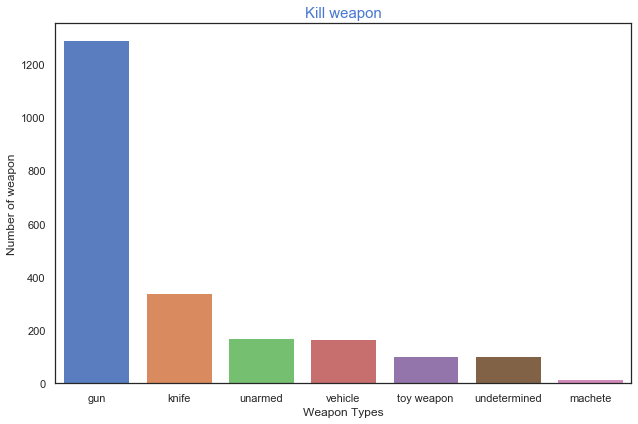

In [58]:
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_title("Kill weapon", fontsize = 15, color = "b")
sb.barplot(x = df["Weapon Types"], y = df["Number of weapon"], data = df)
plt.show()

Text(0.5, 1.0, 'Kill weapon')

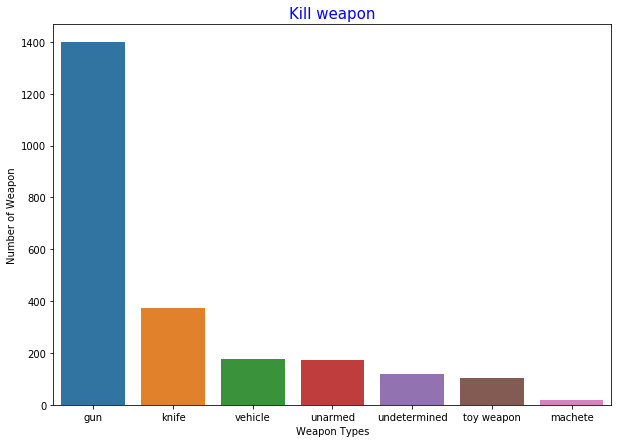

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [144]:
kill.age = kill.age.dropna()

In [ ]:
kill["a_or_bb"] = kill["age"].map(lambda x: "below25" if (x <= 25) else "above25")

In [150]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,a_or_bb,aa_or_bb
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25


Text(0.5, 0, 'age')

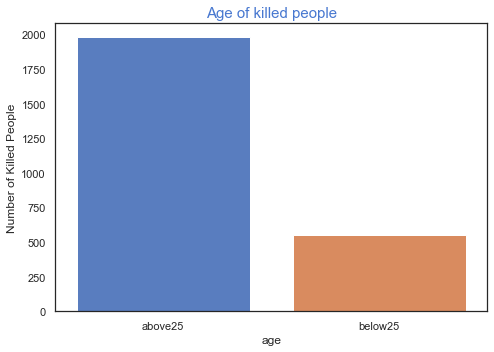

In [134]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.set_title("Age of killed people", fontsize = 15, color = "b")
sb.countplot(x = kill["a_or_bb"], data = kill)
ax1.set_ylabel("Number of Killed People")
ax1.set_xlabel("age")

Text(0.5, 1.0, 'Age of killed people')

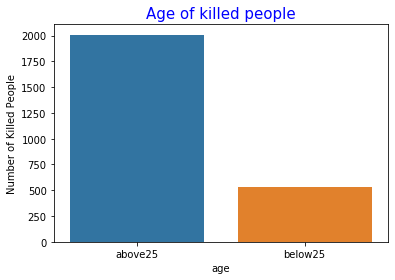

**INSTRUCTION-4: Plot number of killed poeple by race**

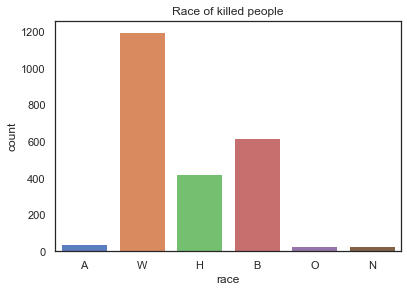

In [66]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.set_title("Race of killed people")
sb.countplot( x = "race", data = kill)

Text(0.5, 1.0, 'Race of killed people')

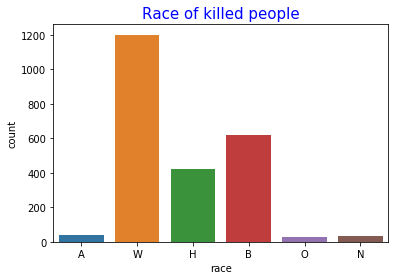

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [56]:
from collections import Counter
c = Counter(kill.city)
mostCommon = c.most_common(12)
df = pd.DataFrame(mostCommon, columns = ["cities", "deaths"])
df

,cities,deaths
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


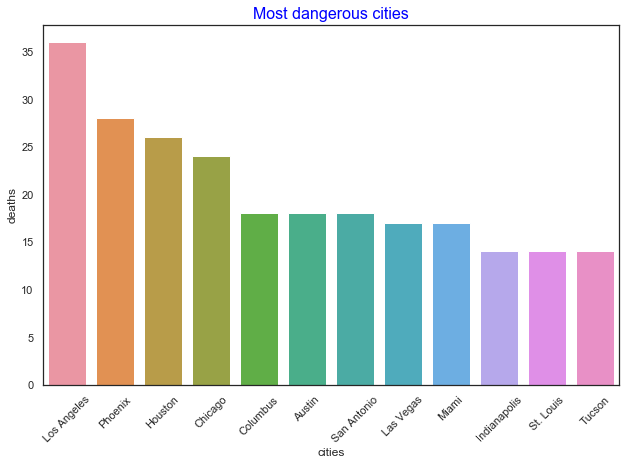

In [68]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Most dangerous cities", color = "blue", fontdict = {"fontsize":16})
sb.barplot( x = "cities", y = "deaths", data = df)
ax.set_xticklabels(labels = df.cities, rotation=45)
plt.show()

In [57]:
nf = pd.read_excel("Abd.xlsx")

In [58]:
nf.head()

,States,POSTAL ABBREVIATION,Population of 2021
0,Alabama,AL,4903185
1,Alaska,AK,731545
2,Arizona,AZ,7278717
3,Arkansas,AR,3017825
4,California,CA,39512223


Text(0.5, 1.0, 'Most dangerous cities')

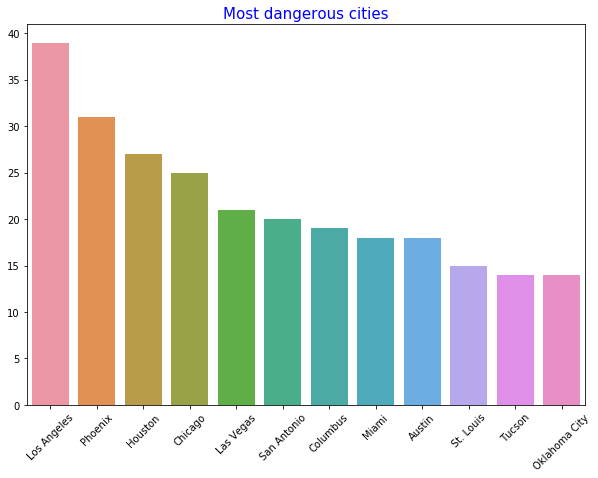

**INSTRUCTION-6: Plot 20 most dangerous states**

In [59]:
from collections import Counter
c = Counter(kill.state)
mostCommon = c.most_common(20)
df = pd.DataFrame(mostCommon, columns = ["state", "deaths"])
df

,state,deaths
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [60]:
df_son = pd.merge(left = df, right = nf[["POSTAL ABBREVIATION","Population of 2021"]], left_on = "state", right_on ="POSTAL ABBREVIATION", how = "left" )

In [61]:
df_son.head()

,state,deaths,POSTAL ABBREVIATION,Population of 2021
0,CA,424,CA,39512223
1,TX,225,TX,28995881
2,FL,154,FL,21477737
3,AZ,118,AZ,7278717
4,OH,79,OH,11689100


In [62]:
df_son["dpp"] = round((df_son["deaths"]/df_son["Population of 2021"])*1000000,2)
#milyon kişi başına düşen polis tarafından öldürülme sayısı

In [63]:
df_son.head()

,state,deaths,POSTAL ABBREVIATION,Population of 2021,dpp
0,CA,424,CA,39512223,10.73
1,TX,225,TX,28995881,7.76
2,FL,154,FL,21477737,7.17
3,AZ,118,AZ,7278717,16.21
4,OH,79,OH,11689100,6.76


In [64]:
df_son = df_son.sort_values(by = "dpp", ascending = False)

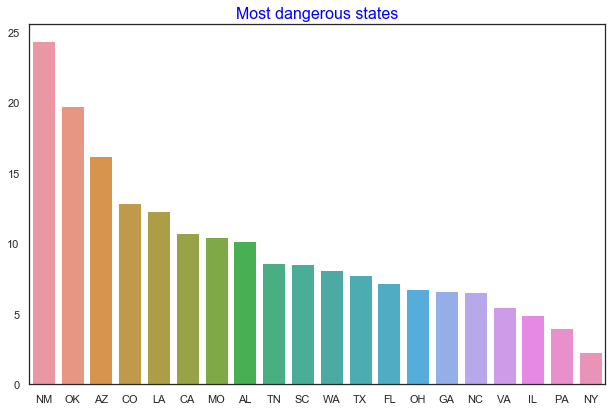

In [189]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Most dangerous states", fontsize = 16, color = "blue")
sb.barplot( x = "state", y = "dpp", data = df_son)
ax.set_xticklabels(labels = df_son.state)
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

In [65]:
df_son.drop(["POSTAL ABBREVIATION", "Population of 2021"],axis = 1, inplace = True )


In [69]:
df_son = df_son.sort_values(by = "dpp", ascending = False)

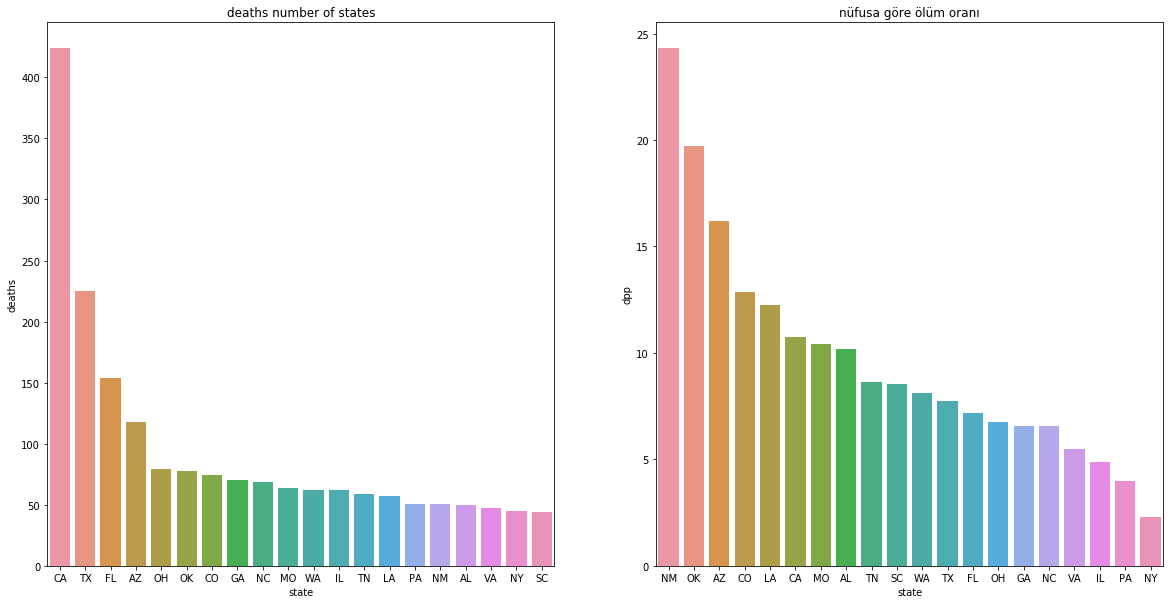

In [70]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121, title = "deaths number of states")
sb.barplot( x = "state", y = "deaths", data = df)
ax2 = fig.add_subplot(122)
ax2.set_title("nüfusa göre ölüm oranı")
plt.subplot(122)
sb.barplot( x = "state", y = "dpp", data = df_son)

yukarida ki 1. grafikte eyalet bazında en çok ölümün yaşandığı eyalet California, sağdaki grafikte ise 1 milyon kişi başına düşen polis tarafından öldürülme oranı en yüksek eyalet Nm dir. California sağdaki grafikte 6. sırada iken scremanto 10. sırada yer alıyor.   

In [53]:
df_son

,state,deaths,dpp
15,NM,51,24.32
5,OK,78,19.71
3,AZ,118,16.21
6,CO,74,12.85
13,LA,57,12.26
0,CA,424,10.73
9,MO,64,10.43
16,AL,50,10.20
12,TN,59,8.63
19,SC,44,8.55


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022814B8DF88>,
      dtype=object)

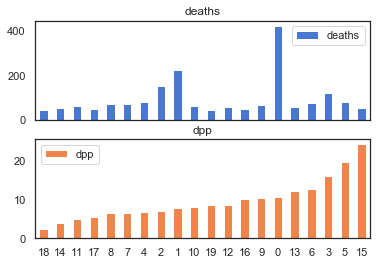

In [198]:
df_son.plot.bar(rot=0, subplots=True)

In [200]:
df_son.head()

,state,deaths,dpp
18,NY,45,2.31
14,PA,51,3.98
11,IL,62,4.89
17,VA,47,5.51
8,NC,69,6.58


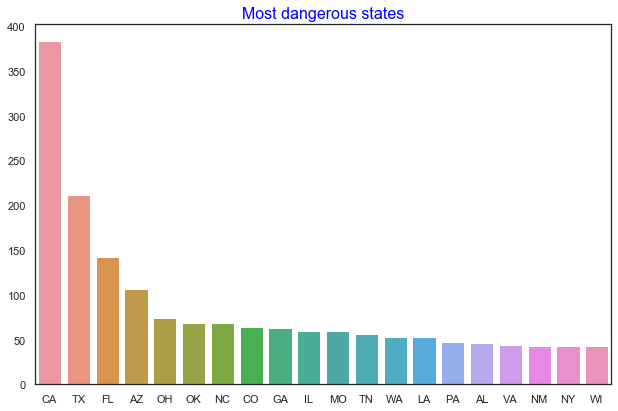

In [87]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Most dangerous states", fontsize = 16, color = "blue")
sb.barplot( x = "state", y = "deaths", data = df)
ax.set_xticklabels(labels = df.state)
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

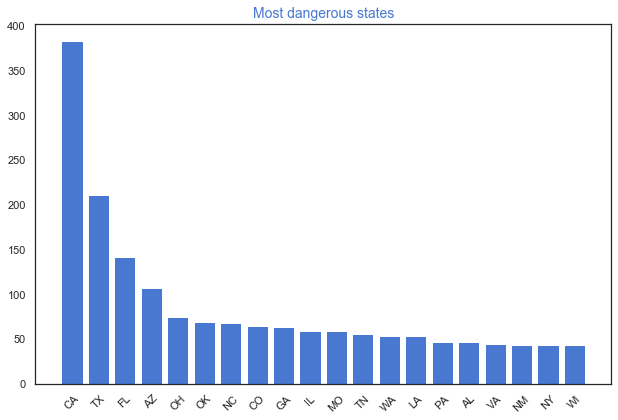

In [71]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Most dangerous states", fontsize = 14, color = "b")
ax.bar( df.state, df.deaths)
ax.set_xticklabels(labels = df.state, rotation=45)
plt.show()

Text(0.5, 1.0, 'Most dangerous state')

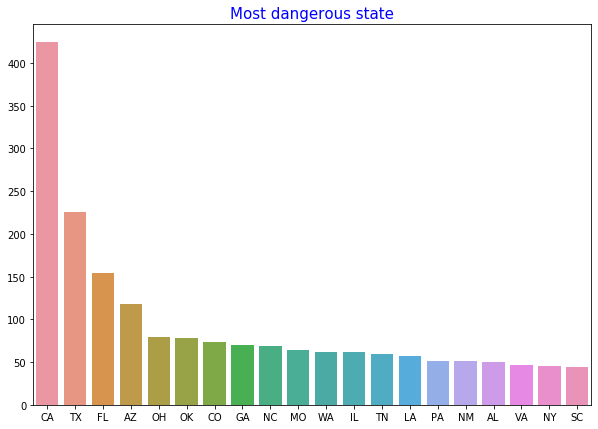

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

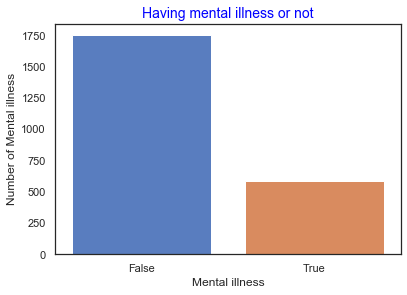

In [73]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.set_title("Having mental illness or not", fontsize = 14, color = "blue")
sb.countplot( x = "signs_of_mental_illness", data = kill)
ax.set_xlabel("Mental illness")
ax.set_ylabel("Number of Mental illness")
plt.show()

Text(0.5, 1.0, 'Having mental illness or not')

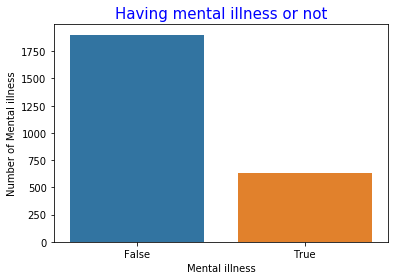

**INSTRUCTION-8: Plot number of Threat Types**

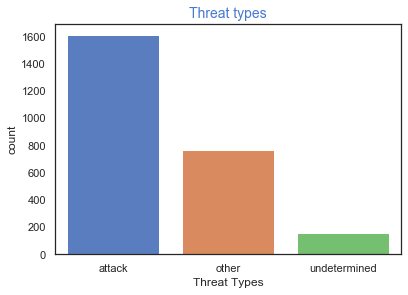

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.set_title("Threat types", fontsize = 14, color = "b")
sb.countplot( x = "threat_level", data = kill)
ax.set_xlabel("Threat Types")
plt.show()

Text(0.5, 1.0, 'Threat types')

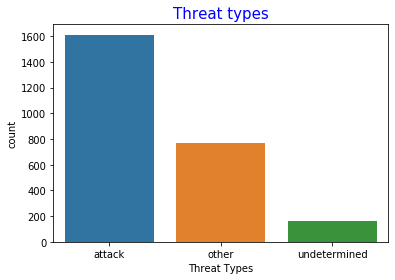

**INSTRUCTION-9: Plot number of Flee Types**

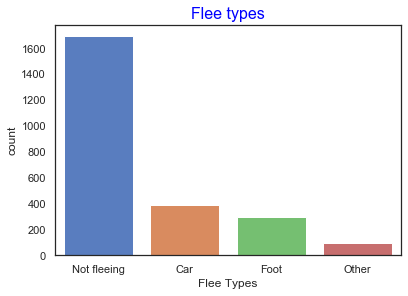

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.set_title("Flee types", fontsize = 16, color = "blue")
sb.countplot( x = "flee", data = kill)
ax.set_xlabel("Flee Types")
plt.show()

Text(0.5, 1.0, 'Flee types')

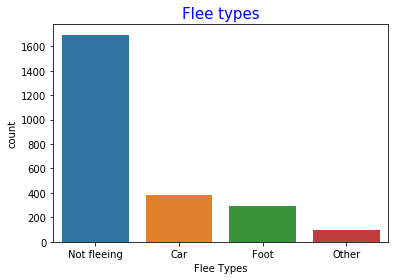